In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
file_inp = pd.read_json('kenh14_20200808_215113.txt', lines = True)
file_inp

,link,title,author,source,description,tags,pub_date,content
0,https://kenh14.vn,None,None,None,None,[],None,
1,https://kenh14.vn/nhom-chu-de/magazine.chn,None,None,None,None,[],None,
2,https://kenh14.vn/doi-song.chn,None,None,None,None,[],None,
3,https://kenh14.vn/beauty-fashion.chn,None,None,None,None,[],None,
4,https://kenh14.vn/doi-song/nhan-vat.chn,None,None,None,None,[],None,
...,...,...,...,...,...,...,...,...
5931,https://kenh14.vn/yeu-cau-tai-xe.html,None,None,None,None,[],None,
5932,https://kenh14.vn/say-xin.html,None,None,None,None,[],None,
5933,https://kenh14.vn/tan-cong-o-london.html,None,None,None,None,[],None,
5934,https://kenh14.vn/ca-voi-sieu-to-khong-lo-xuat...,Cá voi “siêu to khổng lồ” xuất hiện ở vùng biể...,"Thành Nhân,",Helino,\r\n Mới đâ...,"[Kỳ Co, Thành phố biển, vùng biển Việt Nam, ng...",2019-07-10T10:27:00+07:00,"Kỳ Co từ lâu đã được mệnh danh là ""tiểu Maldiv..."


In [4]:
file_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         5936 non-null   object
 1   title        3378 non-null   object
 2   author       3378 non-null   object
 3   source       2739 non-null   object
 4   description  3378 non-null   object
 5   tags         5936 non-null   object
 6   pub_date     3397 non-null   object
 7   content      5936 non-null   object
dtypes: object(8)
memory usage: 371.1+ KB


In [6]:
#filter data
df = file_inp
df = df.dropna()
df

,link,title,author,source,description,tags,pub_date,content
16,https://kenh14.vn/chinh-thuc-trai-nghiem-kenh1...,Chính thức trải nghiệm Kenh14 theo cách hoàn t...,"Kenh14,",Trí Thức Trẻ,\r\n Cấu tr...,"[giaodienmoi, kenh14]",2016-09-26T15:40:00+07:00,Xin chào những độc giả thân mến của Kenh14.vn!...
17,https://kenh14.vn/chuyen-tinh-cu-no-sau-huong-...,"Chuyện tình ""cú nổ"" sau Hương Giang tại ""Người...","C.,",Báo dân sinh,\r\n Tình y...,"[người ấy là ai mùa 3, người ấy là ai, Nguyễn ...",2020-08-08T12:29:00+07:00,Với cái kết có hậu của Hương Giang và CEO Matt...
30,https://kenh14.vn/ceo-vua-thanh-doi-voi-huong-...,CEO vừa thành đôi với Hương Giang: Du lịch cực...,"Anna,",Pháp luật & Bạn đọc,\r\n Không ...,"[CEO, đà lạt, siêu xe, người ấy là ai, hương g...",2020-08-08T13:35:00+07:00,Tập mới nhất của “Người ấy là ai” khép lại với...
31,https://kenh14.vn/gan-ha-noi-lai-co-them-mot-c...,"Gần Hà Nội lại có thêm một cây cầu hoa giấy, c...","Hạ Linh,",Báo dân sinh,\r\n Cây cầ...,"[Hà Nội, cầu Thuỷ Tiên, Khu đô thị Ecopark, ch...",2020-08-08T18:20:00+07:00,"Cứ đến mùa hoa giấy ở Hà Nội, sở thích chụp ản..."
34,https://kenh14.vn/ban-gai-doi-mua-nha-rieng-vi...,Bạn gái đòi mua nhà riêng vì sợ làm dâu như ph...,"Chú Bé Drama,",Báo dân sinh,\r\n Xem ph...,"[chia tay, sống chung với em chồng, mc cát tườ...",2020-08-07T17:25:00+07:00,"Chia tay vì tính tình không hợp, chia tay về y..."
...,...,...,...,...,...,...,...,...
5921,https://kenh14.vn/be-gai-7-tuoi-trong-buc-anh-...,Bé gái trong bức ảnh gây chấn động thế giới về...,"Duy Vu,",Helino,\r\n Cái nh...,"[bé gái 7 tuổi, suy dinh dưỡng, tiếng Ả Rập, t...",2018-11-03T21:38:00+07:00,Chân dung bé Amal Hussain được tờ New York Tim...
5923,https://kenh14.vn/chang-trai-mac-ung-thu-dai-t...,Chàng trai mắc ung thư đại trực tràng khi còn ...,"Gà,",Helino,\r\n Biết m...,"[ung thư đại trực tràng, bệnh ung thư, thay đổ...",2019-05-23T17:00:00+07:00,Thịt nướng là một trong những món ăn được giới...
5924,https://kenh14.vn/nu-y-ta-nhan-nuoi-mot-thien-...,"Nữ y tá nhận nuôi ""một thiên thần"" bị bỏ rơi m...","Đạt Lê,",Helino,\r\n Định m...,"[nữ y tá, bé gái bị bỏ rơi, Bệnh viện nhi, thi...",2019-04-09T20:07:00+07:00,"Vào tháng 7/2016, bé gái Gisele ra đời khi mới..."
5925,https://kenh14.vn/nhan-chung-vu-no-bom-show-di...,Nhân chứng vụ nổ bom show diễn Ariana Grande: ...,"Skye,",Thời Đại,\r\n Tính t...,"[nổ bom, Khủng bố ở Anh, nổ lớn ở Anh, Nghi ph...",2017-05-23T10:28:00+07:00,"Tối hôm thứ hai, 22/5 (theo giờ địa phương), m..."


In [62]:
year = []
for dates in df['pub_date']:
    year.append(int(dates[:4]))
year

[2016,
 2020,
 2020,
 2020,
 2020,
 2020,
 2018,
 2018,
 2019,
 2019,
 2019,
 2020,
 2020,
 2019,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2018,
 2020,
 2020,
 2020,
 2020,
 2018,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2018,
 2020,
 2020,
 2018,
 2020,
 2020,
 2020,
 2020,
 2018,
 2020,
 2020,
 2019,
 2018,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2018,
 2020,
 2020,
 2020,
 2020,
 2020,
 2016,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2020,
 2019,
 2014,
 2015,
 2019,
 2020,
 2020,
 2020,
 2015,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2013,
 2013,
 2017,
 2019,
 2020,
 2020,
 2020,
 2019,
 2017,
 2018,
 2020,
 2019,
 2020,
 2017,
 2019,
 2020,
 2020,
 2019,
 2019,
 2018,
 2020,
 2019,
 2020,
 2018,
 2020,
 2020,
 2020,
 2019,
 2020,
 2020,
 2020,
 2020,
 2020,

In [63]:
#insert 'Year' column to dataframe
df.insert(6,'Year',year)
df

,link,title,author,source,description,tags,Year,pub_date,content
16,https://kenh14.vn/chinh-thuc-trai-nghiem-kenh1...,Chính thức trải nghiệm Kenh14 theo cách hoàn t...,"Kenh14,",Trí Thức Trẻ,\r\n Cấu tr...,"[giaodienmoi, kenh14]",2016,2016-09-26T15:40:00+07:00,Xin chào những độc giả thân mến của Kenh14.vn!...
17,https://kenh14.vn/chuyen-tinh-cu-no-sau-huong-...,"Chuyện tình ""cú nổ"" sau Hương Giang tại ""Người...","C.,",Báo dân sinh,\r\n Tình y...,"[người ấy là ai mùa 3, người ấy là ai, Nguyễn ...",2020,2020-08-08T12:29:00+07:00,Với cái kết có hậu của Hương Giang và CEO Matt...
30,https://kenh14.vn/ceo-vua-thanh-doi-voi-huong-...,CEO vừa thành đôi với Hương Giang: Du lịch cực...,"Anna,",Pháp luật & Bạn đọc,\r\n Không ...,"[CEO, đà lạt, siêu xe, người ấy là ai, hương g...",2020,2020-08-08T13:35:00+07:00,Tập mới nhất của “Người ấy là ai” khép lại với...
31,https://kenh14.vn/gan-ha-noi-lai-co-them-mot-c...,"Gần Hà Nội lại có thêm một cây cầu hoa giấy, c...","Hạ Linh,",Báo dân sinh,\r\n Cây cầ...,"[Hà Nội, cầu Thuỷ Tiên, Khu đô thị Ecopark, ch...",2020,2020-08-08T18:20:00+07:00,"Cứ đến mùa hoa giấy ở Hà Nội, sở thích chụp ản..."
34,https://kenh14.vn/ban-gai-doi-mua-nha-rieng-vi...,Bạn gái đòi mua nhà riêng vì sợ làm dâu như ph...,"Chú Bé Drama,",Báo dân sinh,\r\n Xem ph...,"[chia tay, sống chung với em chồng, mc cát tườ...",2020,2020-08-07T17:25:00+07:00,"Chia tay vì tính tình không hợp, chia tay về y..."
...,...,...,...,...,...,...,...,...,...
5921,https://kenh14.vn/be-gai-7-tuoi-trong-buc-anh-...,Bé gái trong bức ảnh gây chấn động thế giới về...,"Duy Vu,",Helino,\r\n Cái nh...,"[bé gái 7 tuổi, suy dinh dưỡng, tiếng Ả Rập, t...",2018,2018-11-03T21:38:00+07:00,Chân dung bé Amal Hussain được tờ New York Tim...
5923,https://kenh14.vn/chang-trai-mac-ung-thu-dai-t...,Chàng trai mắc ung thư đại trực tràng khi còn ...,"Gà,",Helino,\r\n Biết m...,"[ung thư đại trực tràng, bệnh ung thư, thay đổ...",2019,2019-05-23T17:00:00+07:00,Thịt nướng là một trong những món ăn được giới...
5924,https://kenh14.vn/nu-y-ta-nhan-nuoi-mot-thien-...,"Nữ y tá nhận nuôi ""một thiên thần"" bị bỏ rơi m...","Đạt Lê,",Helino,\r\n Định m...,"[nữ y tá, bé gái bị bỏ rơi, Bệnh viện nhi, thi...",2019,2019-04-09T20:07:00+07:00,"Vào tháng 7/2016, bé gái Gisele ra đời khi mới..."
5925,https://kenh14.vn/nhan-chung-vu-no-bom-show-di...,Nhân chứng vụ nổ bom show diễn Ariana Grande: ...,"Skye,",Thời Đại,\r\n Tính t...,"[nổ bom, Khủng bố ở Anh, nổ lớn ở Anh, Nghi ph...",2017,2017-05-23T10:28:00+07:00,"Tối hôm thứ hai, 22/5 (theo giờ địa phương), m..."


In [23]:
sum_news = len(df)
sum_news

2739

In [72]:
df.loc[30,'tags']

['CEO', 'đà lạt', 'siêu xe', 'người ấy là ai', 'hương giang', 'matt liu']

In [73]:
len(df.loc[30,'tags'])

6

In [166]:
gr_year = df.groupby('Year')
gr_year.size()

Year
2012       5
2013      67
2014      63
2015     110
2016     108
2017     163
2018     347
2019     803
2020    1073
dtype: int64

No handles with labels found to put in legend.


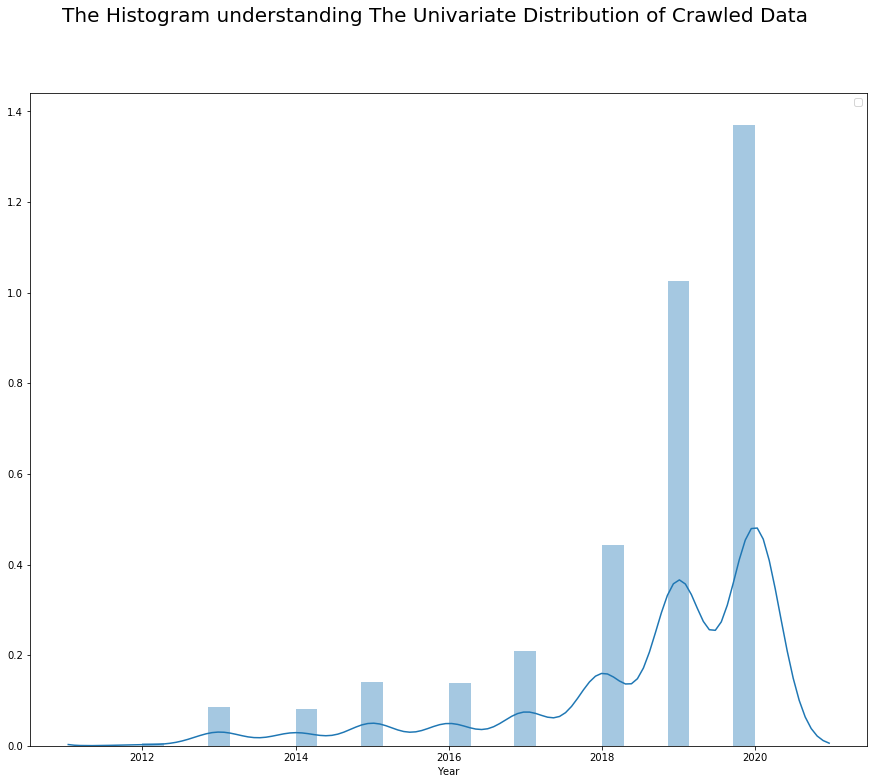

In [173]:
sns.distplot(df['Year']) 

plt.legend()
plt.suptitle('The Histogram understanding The Univariate Distribution of Crawled Data',fontsize = 20)

plt.show()


In [185]:
year_ = gr_year.size().index
quantity_ = gr_year.size()

In [186]:
#year_ = gr_year.size().index
year_

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')

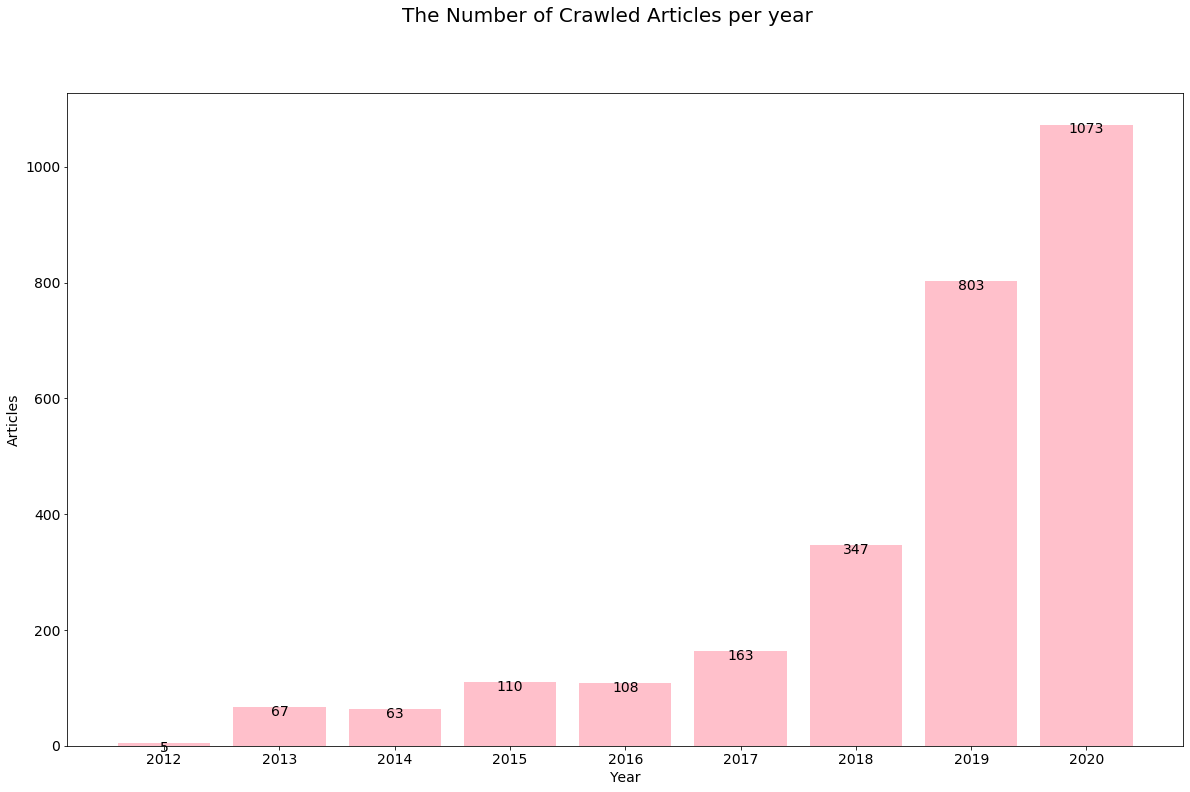

In [195]:
plt.xlabel('Year',fontsize = 14)
plt.xticks(rotation=0,fontsize = 14)
plt.yticks(rotation=0,fontsize = 14)
plt.xticks(year_)                #shows all years in label

plt.ylabel('Articles',fontsize = 14)           
plt.suptitle('The Number of Crawled Articles per year',fontsize =20)

for bar in plt.bar(year_, quantity_,color ='pink'):        
    plt.text(bar.get_x() + .4,              #x position of label
             bar.get_height() - 20,           #y position of label
             bar.get_height(),              #actual value of label
             ha='center',
             va='bottom',
             color='black',
             fontsize =14,
             )


In [32]:
gr_source = df.groupby('source')

In [92]:
gr_source.size()

source
Báo dân sinh             43
Helino                  695
Mask Online              28
Nhịp Sống Việt          101
Pháp luật & Bạn đọc      96
Pháp luật xã hội         25
Thế giới trẻ              1
Thời Đại                 53
Trí Thức Trẻ           1616
Tổ quốc                  81
dtype: int64

In [99]:
list_source = gr_source.size().index
list_source

Index(['Báo dân sinh', 'Helino', 'Mask Online', 'Nhịp Sống Việt',
       'Pháp luật & Bạn đọc', 'Pháp luật xã hội', 'Thế giới trẻ', 'Thời Đại',
       'Trí Thức Trẻ', 'Tổ quốc'],
      dtype='object', name='source')

In [130]:
rate_source = gr_source.size() / sum_news * 100
rate_source

source
Báo dân sinh            1.569916
Helino                 25.374224
Mask Online             1.022271
Nhịp Sống Việt          3.687477
Pháp luật & Bạn đọc     3.504929
Pháp luật xã hội        0.912742
Thế giới trẻ            0.036510
Thời Đại                1.935013
Trí Thức Trẻ           58.999635
Tổ quốc                 2.957284
dtype: float64

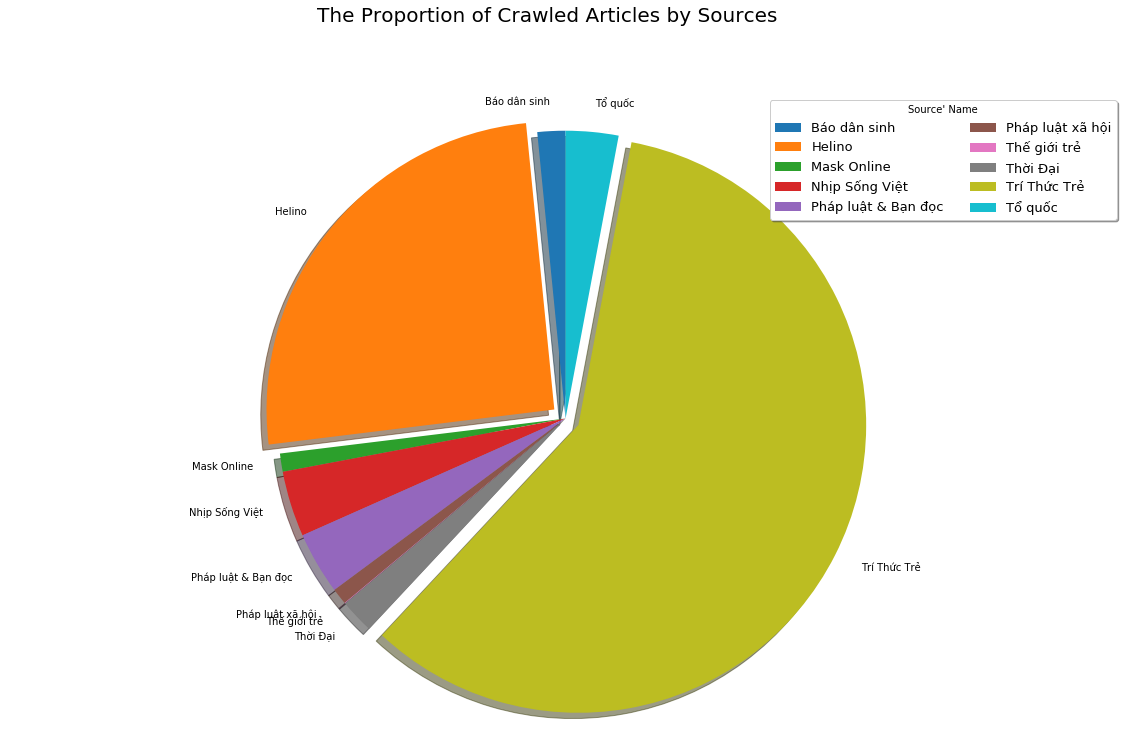

In [174]:
plt.rcParams['figure.figsize'] = (20,12)
Explode = [0,0.05,0,0,0,0,0,0,0.05,0]
plt.pie(rate_source , explode=Explode, labels=list_source , shadow =True , startangle=90)
plt.axis('equal')
plt.suptitle('The Proportion of Crawled Articles by Sources',fontsize =20)
plt.legend(title = "Source' Name",fontsize = 13, shadow = True,ncol =2)
plt.show()

In [121]:
gr_source_author = df.groupby(['source','author'])
gr_source_author.size()

source        author                        
Báo dân sinh  BOBO,                             1
              Bell Shino,                       1
              Bình An,                          1
              C.,                               1
              Chú Bé Drama,                     1
                                               ..
Tổ quốc       Văn Nguyễn,                       1
              Văn Tiên,                         1
              Vũ Trịnh - Design: Hoàng Anh,     1
              Vũ Trịnh - Ảnh: Hoàng Anh,        1
              lilas,                            2
Length: 981, dtype: int64

In [127]:
gr_source.get_group('Pháp luật xã hội')

,link,title,author,description,tags,pub_date,content
645,https://kenh14.vn/doc-cham/pablo-picasso-va-ge...,Pablo Picasso và Georges Braque – Bạn hay thù?,"Kachi,",\r\n Pablo ...,"[Pháp, Lemon, khắc nghiệt, Thế chiến, Pablo Pi...",2013-12-25T14:00:00+07:00,
667,https://kenh14.vn/xem-an-choi/baskin-robbins-m...,BASKIN ROBBINS – Mừng sinh nhật 2 tuổi,"Saga,",\r\n Chào đ...,"[ăn chơi, xem ăn chơi, hà nội, Tp.HCM, Thảo Đi...",2014-01-17T14:30:00+07:00,
678,https://kenh14.vn/doc-cham/hau-truong-hoang-gi...,Hậu trường Hoàng gia Nhật Bản,"Kachi,",\r\n Những ...,"[Hoàng đế, Samurai, Hoàng cung, cung điện, Thư...",2014-01-19T00:00:00+07:00,
687,https://kenh14.vn/xem-an-choi/an-kem-tha-ga-tr...,"“Ăn kem thả ga, trúng ngay Vespa” tại BASKIN R...","Saga,",\r\n Cùng H...,"[ăn chơi, xem ăn chơi, nguyễn thị minh khai, h...",2014-01-10T08:00:00+07:00,
1140,https://kenh14.vn/doi-song/neu-em-buong-tay-an...,"Nếu em buông tay, anh sẽ hạnh phúc chứ?","CaDe,",\r\n Thật l...,"[chia tay tình yêu, Trái tim có nắng, hạnh phú...",2014-02-21T00:02:00+07:00,"Lúc yêu thương thì chẳng cần lý do, đến khi ch..."
1795,https://kenh14.vn/musik/bap-am-chiec-cup-dau-t...,B.A.P ẵm chiếc cúp đầu tiên đúng Valentine,"Peony,",\r\n Chiều ...,"[hot clip, on stage, girl's day, stellar, musi...",2014-02-15T14:48:00+07:00,\n\n
2047,https://kenh14.vn/sport/ban-tin-sea-games-ngay...,Bản tin SEA Games ngày 12/12: Tuyển Futsal nữ ...,"Rio (Tổng hợp),",\r\n Nữ fut...,"[bơi lội, việt nam, thái lan, Indonesia, nội d...",2013-12-12T12:33:00+07:00,
2099,https://kenh14.vn/sport/ban-tin-sea-games-27-n...,Bản tin SEA Games 27 ngày 6/12: U23 Việt Nam t...,"Rio (Tổng hợp),",\r\n HLV Ho...,"[bóng rổ, bơi lội, việt nam, chiến thắng, In...",2013-12-06T14:41:00+07:00,
2775,https://kenh14.vn/la-cool/choang-vang-tu-goc-n...,Choáng váng từ góc nhìn trên chiếc lồng kính t...,"Sushi and Yasha,",\r\n Liệu b...,"[nước pháp, nghệ thuật, video, Hoa Kỳ, Thụy Sĩ...",2013-12-22T15:18:00+07:00,
3652,https://kenh14.vn/star/con-trai-lam-chi-dinh-d...,Con trai Lâm Chí Dĩnh đáng yêu với “mắt hai mí...,"Cách Cách,",\r\n Trong ...,"[lâm chí dĩnh, gia đình, dễ thương, tết, đáng ...",2014-02-01T14:00:00+07:00,


In [128]:
gr_source.get_group('Pháp luật xã hội').groupby('author')

In [129]:
gr_source.get_group('Pháp luật xã hội').groupby('author').size()

author
A,                   1
CaDe,                1
Chi Mai,             1
Chu Đình Tới,        1
Cách Cách  ,         1
Cách Cách ,          1
Cách Cách,           1
Doanh Vũ ,           1
GG,                  1
HG,                  1
Kachi,               2
Peony,               2
Rio (Tổng hợp),      2
Rio,                 1
Saga,                5
SnY,                 1
Sushi and Yasha,     1
Vic,                 1
dtype: int64

In [140]:
gr_source_index = gr_source.size().axes
gr_source_index

[Index(['Báo dân sinh', 'Helino', 'Mask Online', 'Nhịp Sống Việt',
        'Pháp luật & Bạn đọc', 'Pháp luật xã hội', 'Thế giới trẻ', 'Thời Đại',
        'Trí Thức Trẻ', 'Tổ quốc'],
       dtype='object', name='source')]

In [143]:
names_source = gr_source_index[0]

In [153]:
num_of_author_s = []
for name in names_source:
    num_of_author_s.append(
        len(gr_source.get_group(name).groupby('author').size())
    )

In [154]:
num_of_author_s

[31, 255, 17, 46, 49, 18, 1, 29, 486, 49]

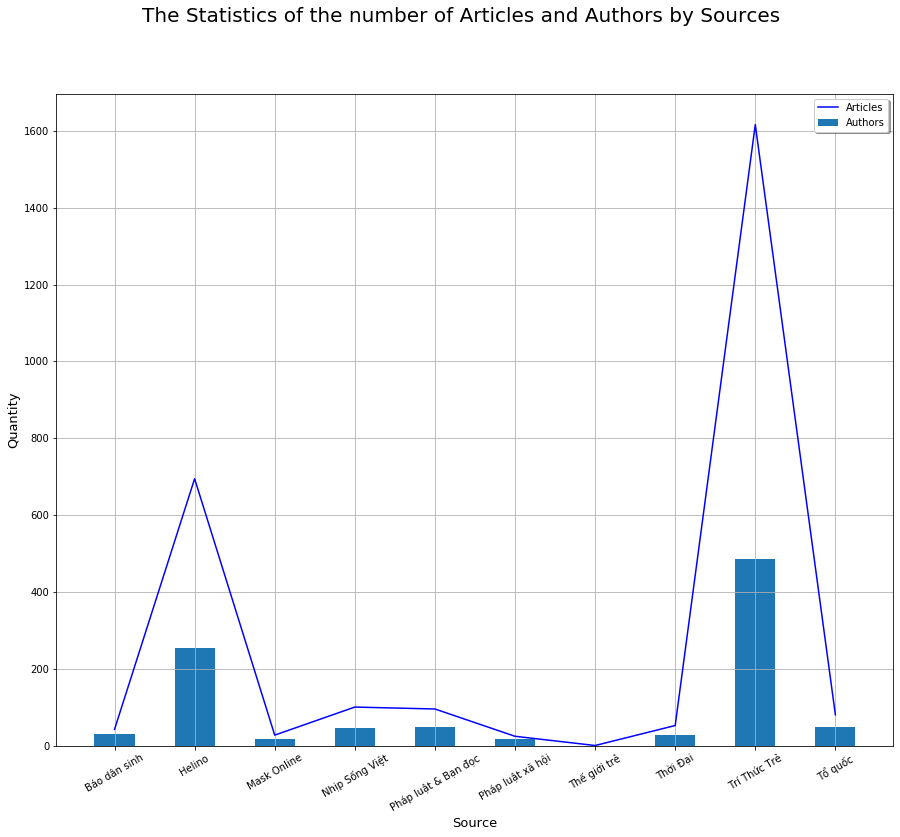

In [163]:
plt.rcParams['figure.figsize'] = (15,12)
x1 = names_source
y1 = num_of_author_s
y2 = gr_source.size()

plt.grid()
plt.xticks(rotation=30)

plt.xlabel('Source',fontsize =13)
plt.ylabel('Quantity',fontsize =13)
plt.suptitle('The Statistics of the number of Articles and Authors by Sources',fontsize =20)

plt.plot(x1, y2, label='Articles',color ='blue')
plt.bar(x1,y1,width=0.5,label = 'Authors')

plt.legend(shadow = True)
plt.show()